In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [246]:

def load_data(file_path):
    """
    Carga los datos desde un archivo CSV.
    """
    data = pd.read_csv(file_path)
    data = data.drop('Feature3',axis=1)
    return data.values

def initialize_centroids(data, k):
    """
    Inicializa los centroides seleccionando k puntos aleatorios de los datos.
    """
    indices = np.random.choice(data.shape[0], k, replace=False)
    centroids = data[indices]
    return centroids

def assign_clusters(data, centroids):
    """
    Asigna cada punto de datos al centroide más cercano usando la distancia euclidiana.

    Args:
        data (np.ndarray): Matriz de datos.
        centroids (np.ndarray): Matriz de centroides.

    Returns:
        np.ndarray: Arreglo de asignaciones de clusters para cada punto de datos.
    """
    clusters = []
    for point in data:
        # Calcula la distancia euclidiana entre el punto y cada centroide
        distances = np.linalg.norm(point - centroids, axis=1)
        # Encuentra el índice del centroide más cercano
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

def update_centroids(data, clusters, k):
    """
    Actualiza los centroides recalculando la media de los puntos asignados a cada cluster.
    """
    new_centroids = []
    for i in range(k):
        points = data[clusters == i]
        new_centroid = points.mean(axis=0)
        new_centroids.append(new_centroid)
    return np.array(new_centroids)

def calculate_inertia(data, centroids, clusters):
    """
    Calcula la Suma de Errores Cuadráticos Internos (SSE).
    Calcula la inercia, que es la suma de las distancias al cuadrado de cada punto al centroide más cercano.
    """
    inertia = 0
    for i, centroid in enumerate(centroids):
        points = data[clusters == i]
        distances = np.linalg.norm(points - centroid, axis=1)
        inertia += np.sum(distances**2)
    return inertia

def kmeans(data, k, max_iters=100):
    """
    Implementa el algoritmo de K-Means.
    """
    centroids = initialize_centroids(data, k)
    for _ in range(max_iters):
        clusters = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, clusters, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    inertia = calculate_inertia(data, centroids, clusters)
    return centroids, clusters, inertia

def print_clusters(data, clusters, centroids):
    """
    Imprime los puntos que pertenecen a cada centroide.
    """
    for i, centroid in enumerate(centroids):
        points = data[clusters == i]
        print(f"Centroid {i+1}: {centroid}")
        print(f"Points:\n {points}\n")


def elbow_method(data, k_range):
    """
    Implementa el método del codo para seleccionar el mejor valor de K.
    """
    inertias = []
    for k in k_range:
        _, _, inertia = kmeans(data, k)
        inertias.append(inertia)
    return inertias

def calculate_errors(inertias):
    errors = np.diff(inertias)  # Diferencia entre valores consecutivos
    return abs(errors)


def plot_elbow_method(k_range, inertias):
    """
    Grafica el método del codo para seleccionar el mejor valor de K.
    """
    # Grafica el método del codo
    plt.figure(figsize=(8, 6))
    plt.plot(k_range, inertias, marker='o')
    plt.xlabel('Número de clusters, K')
    plt.ylabel('Inercia')
    plt.title('Método del Codo para determinar el valor óptimo de K')
    plt.show()

def plot_sse(k_range, sses):
    """
    Grafica el SSE en función del rango de valores de K.

    Args:
        k_range (range): Rango de valores de K.
        sses (list): Lista de valores de SSE calculados.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, sses, marker='o', linestyle='-', color='r')
    plt.xlabel('Número de Clusters (K)')
    plt.ylabel('Suma de Errores Cuadráticos Internos (SSE)')
    plt.title('SSE para Diferentes Valores de K')
    plt.grid(True)
    plt.show()


def plot_clusters(data, clusters, centroids):
    """
    Grafica los puntos y los centroides resultantes del algoritmo K-Means.
    """
    pca = PCA(2)
    data_pca = pca.fit_transform(data)
    centroids_pca = pca.transform(centroids)

    plt.figure(figsize=(10, 8))
    unique_clusters = np.unique(clusters)
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))

    for i, cluster in enumerate(unique_clusters):
        points = data_pca[clusters == cluster]
        plt.scatter(points[:, 0], points[:, 1], color=colors[i], marker='o', alpha=0.5)
        plt.scatter(centroids_pca[i, 0], centroids_pca[i, 1], color=colors[i], marker='X', s=200, edgecolor='black', label=f'Centroid {i+1}')

    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.title('Clusters y Centroides')
    plt.grid(True)
    plt.legend()

    # Ajuste para asegurar que todos los valores del eje x se muestren
    # x_min, x_max = data_pca[:, 0].min(), data_pca[:, 0].max()
    plt.xticks(np.arange(-1, 1 + 1, 1))
    plt.yticks(np.arange(-1, 1 + 1, 1))
    plt.tight_layout()
    plt.show()


In [247]:
# Carga los datos desde el archivo CSV
file_path = 'csv/sample_data.csv'
data = load_data(file_path)

In [248]:
# Define el rango de valores de K a probar
k_range = range(1, 11)

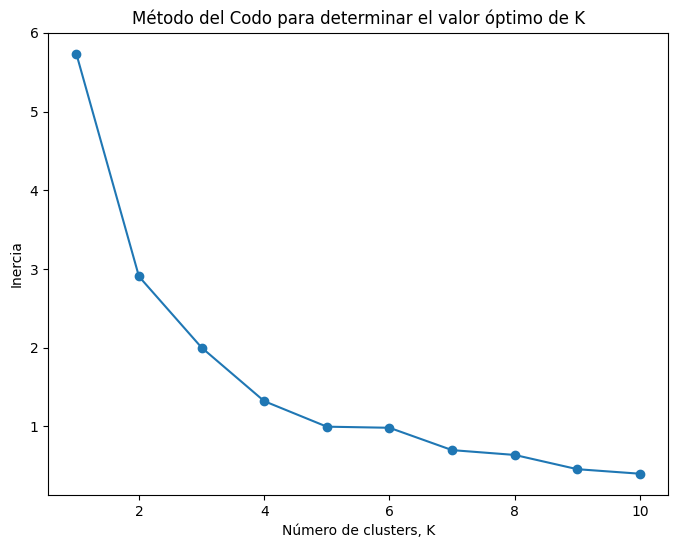

In [249]:
# Calcula las inercias para cada valor de K
inertias = elbow_method(data, k_range)
plot_elbow_method(k_range, inertias)

K = 1 -> ERROR: 5.734864822550756
K = 2 -> ERROR: 2.9035250947454045
K = 3 -> ERROR: 1.7496518985835734
K = 4 -> ERROR: 1.2148075568399934
K = 5 -> ERROR: 0.891093635305528
K = 6 -> ERROR: 0.6859093001645737
K = 7 -> ERROR: 0.6462929250932109
K = 8 -> ERROR: 0.6477119100167442
K = 9 -> ERROR: 0.7252442386043628
K = 10 -> ERROR: 0.4174119397132989


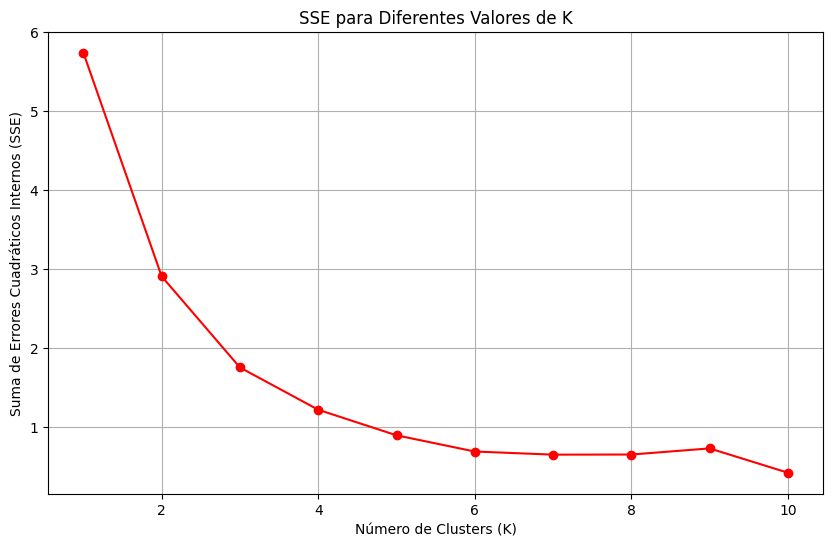

In [250]:

sses = elbow_method(data, k_range)

for sse, k in zip(sses, k_range):
    print(f"K = {k} -> ERROR: {sse}")

plot_sse(k_range, sses)

Centroid 1: [0.92481309 0.60028805]
Points:
 [[0.91193975 0.85950191]
 [0.94708574 0.31514843]
 [0.83245046 0.64008423]
 [0.99256226 0.48890409]
 [0.9295339  0.50482284]
 [0.87959949 0.7223587 ]
 [0.98052004 0.67119613]]

Centroid 2: [0.49895912 0.84690972]
Points:
 [[0.44493733 0.89146024]
 [0.50138243 0.81511578]
 [0.25736298 0.82378656]
 [0.35239771 0.80903547]
 [0.71885313 0.87722846]
 [0.67383653 0.76932196]
 [0.6919809  0.7356457 ]
 [0.75626219 0.98121743]
 [0.55136952 0.9915707 ]
 [0.04513124 0.8296808 ]
 [0.46841316 0.93715563]
 [0.52558232 0.70169789]]

Centroid 3: [0.21719452 0.30021985]
Points:
 [[0.07586357 0.21746078]
 [0.23478915 0.27225044]
 [0.26331249 0.35338444]
 [0.38787873 0.42276495]
 [0.26048886 0.11618496]
 [0.1282367  0.10121962]
 [0.26639933 0.58781877]
 [0.10175449 0.36419281]
 [0.23602737 0.26670188]]

Centroid 4: [0.6114797  0.16296716]
Points:
 [[0.57137013 0.09938509]
 [0.42279036 0.11043096]
 [0.68557598 0.30096124]
 [0.55407971 0.24323254]
 [0.58204146 0

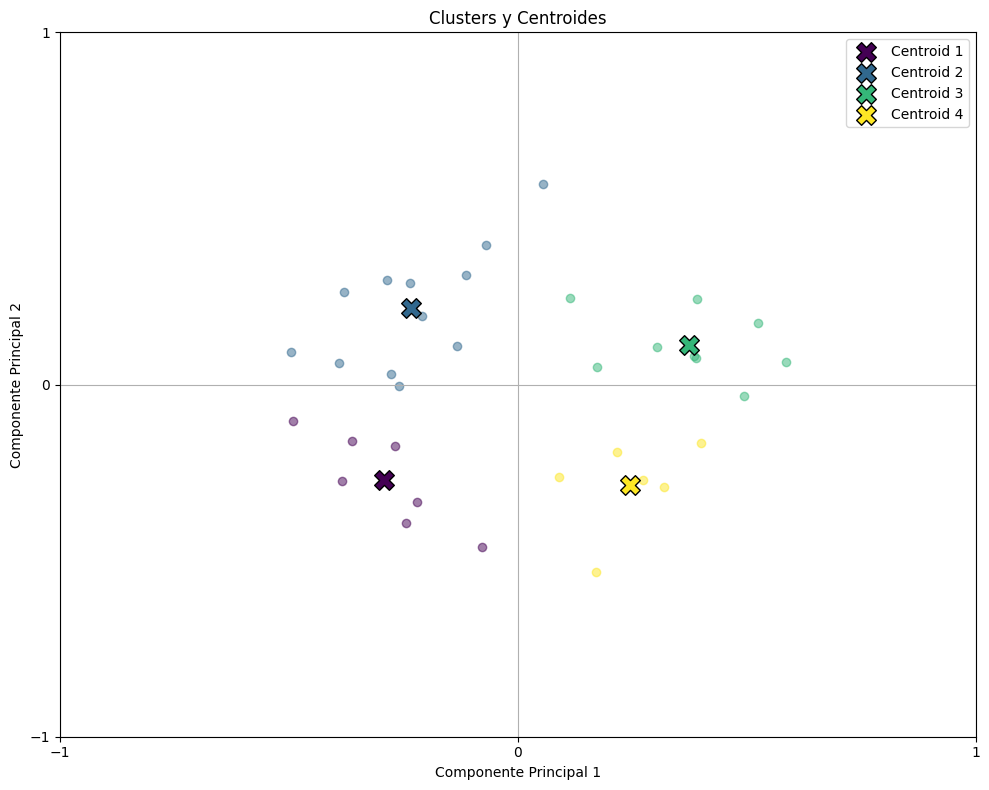

In [251]:
# Define el número de clusters
k = 4

# Ejecuta el algoritmo de K-Means
centroids, clusters, _ = kmeans(data, k)

# Imprime los resultados
# print("Centroides finales:")
# print(centroids)
# print("Asignaciones de clusters:")
# print(clusters)
print_clusters(data, clusters, centroids)

# Grafica los clusters y los centroides
plot_clusters(data, clusters, centroids)